In [2]:
import pandas as pd 
pd.options.display.float_format = '{:,.3f}'.format
import numpy as np
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import distance  

In [47]:
df_raw = pd.DataFrame()

# data_xls = pd.read_excel("../20220810_0622_MESH_ANSIS_C136_50_120V_T2C1.xls")
# data_xls = pd.read_excel("../20220810_0626_MESH_ANSIS_C136_50_120V_T2C2.xls")
# data_xls = pd.read_excel("../20220810_0701_MESH_ANSIS_C136_50_120V_T2C3.xls")
# data_xls = pd.read_excel("../20220810_0722_MESH_ANSIS_C136_50_120V_T2C4.xls")
# data_xls = pd.read_excel("../20220810_0733_MESH_ANSI_C136_50_120V_T2C5.xls")
# data_xls = pd.read_excel("../20220810_0741_MESH_ANSI_C136_50_120V_T2C6.xls")
# data_xls = pd.read_excel("../20220810_0750_MESH_ANSI_C136_50_120V_T2C7.xls")

data_xls = pd.read_excel("../20220810_1125_MESH_ANSI_C136_50_120V_T3C9.xls")

data_length = len(data_xls['PM Sec'])-1

# Raw measures with correction of the measuring start timestamp
df_raw['PM s'] = data_xls['PM Sec'] - data_xls['PM Sec'][0]
df_raw['G4 s'] = data_xls['G4 time stamp [s]'] - data_xls['G4 time stamp [s]'][0]
df_raw['PM Wh'] = data_xls['PM Whr'] - data_xls['PM Whr'][0]
df_raw['G4 Wh pre'] = data_xls['G4 active energy [Wh]'] - data_xls['G4 active energy [Wh]'][0]
df_raw['PM Vrms'] = data_xls['PM Vrms']
df_raw['PM Arms'] = data_xls['PM Arms']

df = pd.DataFrame(
    data={
        "G4 Wh": np.interp(df_raw['PM s'], df_raw['G4 s'], df_raw['G4 Wh pre']),
        "G4 Vrms": np.interp(df_raw['PM s'], df_raw['G4 s'], data_xls['G4 voltage [V]']),
        "G4 Arms": np.interp(df_raw['PM s'], df_raw['G4 s'], data_xls['G4 current [A]'])
    }
)
df_raw = pd.concat([df_raw, df], axis=1)

error_class = 0.5/100

df_raw['Max_Error'] = 100*error_class*np.ones(len(df_raw['PM s']))
df_raw['Min_Error'] = -100*error_class*np.ones(len(df_raw['PM s']))
df_raw["Error"] = 100*(df_raw["G4 Wh"]-df_raw['PM Wh'])/df_raw['PM Wh']
df_raw["Voltage_Error"] = 100*(df_raw["G4 Vrms"]-df_raw['PM Vrms'])/df_raw['PM Vrms']
df_raw["Current_Error"] = 100*(df_raw["G4 Arms"]-df_raw['PM Arms'])/df_raw['PM Arms']
print(f'Max Raw Error: {df_raw["Error"].abs().max()}')
df_raw = df_raw.drop(0)
# df_raw = df_raw.drop(19)

df_raw

Max Raw Error: 7.6317847711289195


PM s   G4 s  PM Wh  G4 Wh pre  PM Vrms  PM Arms  G4 Wh  G4 Vrms  G4 Arms  \
1   8.222  8.996  1.077      1.089  119.360    7.458  0.995  119.054    7.352   
2  16.924 16.994  2.216      2.056  119.370    7.456  2.047  119.118    7.352   
3  25.146 24.992  3.293      3.024  119.370    7.455  3.042  119.085    7.348   
4  33.365 33.990  4.369      4.111  119.370    7.454  4.035  119.117    7.353   
5  42.070 41.985  5.508      5.079  119.360    7.454  5.089  119.049    7.347   
6  50.292 50.978  6.584      6.168  119.360    7.454  6.085  119.114    7.351   
7  58.511 58.976  7.660      7.135  119.360    7.454  7.079  119.052    7.351   
8  67.216 66.974  8.799      8.104  119.360    7.454  8.133  119.117    7.355   
9  75.438 75.972  9.875      9.190  119.350    7.453  9.126  119.052    7.347   
10 83.657 83.970 10.950     10.157  119.370    7.454 10.119  119.116    7.346   
11 91.879 91.961 12.026     11.124  119.370    7.451 11.114  119.049    7.353   

    Max_Error  Min_Error  Error  Voltage_Error  Current_Error  
1       0.500     -0.500 -7.585         -0.256         -1.419  
2       0.500     -0.500 -7.630         -0.211         -1.390  
3       0.500     -0.500 -7.616         -0.239         -1.429  
4       0.500     -0.500 -7.632         -0.212         -1.360  
5       0.500     -0.500 -7.604         -0.261         -1.438  
6       0.500     -0.500 -7.580         -0.206         -1.381  
7       0.500     -0.500 -7.586         -0.258         -1.384  
8       0.500     -0.500 -7.572         -0.204         -1.325  
9       0.500     -0.500 -7.590         -0.250         -1.428  
10      0.500     -0.500 -7.592         -0.213         -1.442  
11      0.500     -0.500 -7.583         -0.269         -1.315

In [49]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

df_raw.plot(y='Max_Error', ax=ax, figsize=(sizeh, sizev), label="Max_Error", linewidth=1, color='red')
df_raw.plot(y='Min_Error', ax=ax, figsize=(sizeh, sizev), label="Min_Error", linewidth=1, color='blue')
# ax.fill_between(df_raw['PM s'], df_raw['Max_Error'], df_raw['Min_Error'], facecolor ='green', alpha = 0.10)
df_raw.plot(y='Voltage_Error', ax=ax, figsize=(sizeh, sizev), label="Voltage_Error", linewidth=1, marker='o', color='g')
df_raw.plot(y='Current_Error', ax=ax, figsize=(sizeh, sizev), label="Current_Error", linewidth=1, marker='o', color='violet')
ax.set_xlabel("Samples", fontsize=18)
ax.set_ylabel("Error (%)", fontsize=18)
# plt.axis((1, 10, -1, 1))
# plt.axis((1, 10, -0.75, 0.75))
plt.legend(loc=1, fontsize = 14)
plt.grid(True)

In [50]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

# df_raw.plot(y='Error_original', x='PM s', ax=ax, figsize=(sizeh, sizev), label="Error_original", linewidth=1, marker='o')
df_raw.plot(y='Max_Error', x='PM s', ax=ax, figsize=(sizeh, sizev), label="Max_Error", linewidth=1, color='red')
df_raw.plot(y='Min_Error', x='PM s', ax=ax, figsize=(sizeh, sizev), label="Min_Error", linewidth=1, color='blue')
ax.fill_between(df_raw['PM s'], df_raw['Max_Error'], df_raw['Min_Error'], facecolor ='green', alpha = 0.10)
df_raw.plot(y='Error', x='PM s', ax=ax, figsize=(sizeh, sizev), label="Energy_Error", linewidth=1, marker='o', color='g')
ax.set_xlabel("Time (s)", fontsize=18)
ax.set_ylabel("Error (%)", fontsize=18)
# plt.axis((0, 600, -1, -0.5))
plt.legend(loc=1, fontsize = 14)
plt.grid(True)

In [120]:
print(f"Error: {100*(df_raw['G4 Wh'][data_length]-df_raw['PM Wh'][data_length])/df_raw['PM Wh'][data_length]}")

Error: -0.08765977490417409


In [95]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

df_raw.plot(y='PM Wh', x='PM s', ax=ax, figsize=(sizeh, sizev), label="PM Wh", linewidth=3, marker='o')
df_raw.plot(y='G4 Wh', x='G4 s', ax=ax, figsize=(sizeh, sizev), label="G4 Wh", linewidth=3, marker='o')
# df_raw.plot(y='G4 Wh', x='G4 s', ax=ax, figsize=(sizeh, sizev), label="G4 Wh", linewidth=3, marker='o')
ax.set_xlabel("Time (s)", fontsize=18)
ax.set_ylabel("Active Energy (Wh)", fontsize=18)
# plt.axis((30, 55, 3, 5))
plt.legend(loc=2, fontsize = 14)
plt.grid(True)

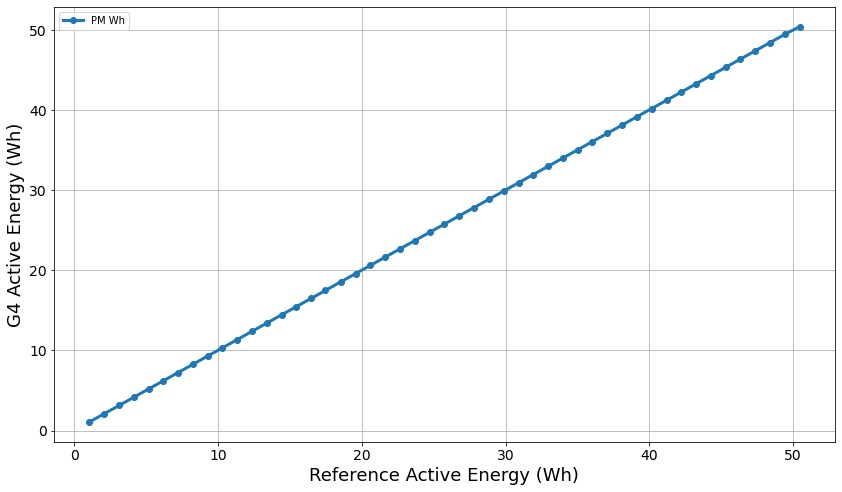

In [96]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

# df_measurements['Reference'].plot(ax=ax, figsize=(sizeh, sizev), label="Reference", linewidth=1, marker='x')
# df_measurements['DUT'].plot(ax=ax, figsize=(sizeh, sizev), label="DUT", linewidth=1, marker='x')
df_raw.plot(y='G4 Wh', x='PM Wh', ax=ax, figsize=(sizeh, sizev), label="PM Wh", linewidth=3, marker='o')
# df_raw.plot(y='G4 Wh', x='G4 s', ax=ax, figsize=(sizeh, sizev), label="G4 Wh", linewidth=3, marker='o')
# df_raw.plot(y='G4 Wh', x='G4 s', ax=ax, figsize=(sizeh, sizev), label="G4 Wh", linewidth=3, marker='o')
ax.set_xlabel("Reference Active Energy (Wh)", fontsize=18)
ax.set_ylabel("G4 Active Energy (Wh)", fontsize=18)
# ax.set_ylabel("Active Energy (Wh)", fontsize=18)
# plt.axis((0, 30, 0.8, 3.5))
# plt.legend(loc=2, fontsize = 14)
plt.grid(True)

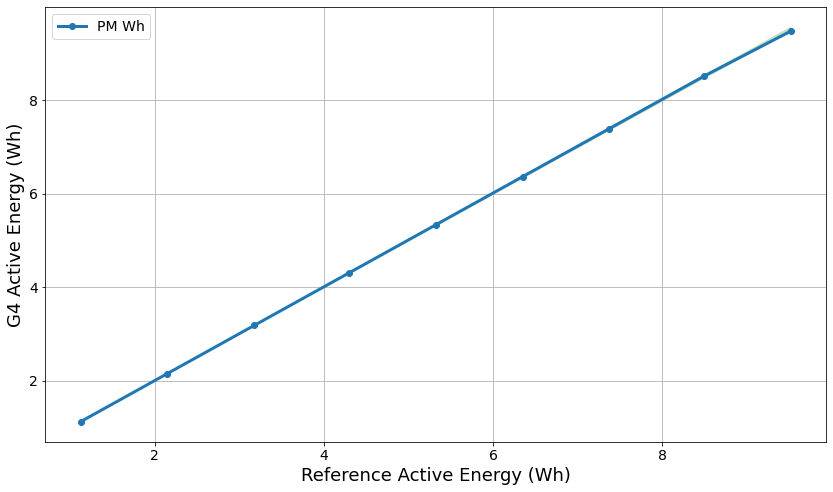

In [85]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

df_raw['yup'] = df_raw['PM Wh'] + error_class*df_raw['PM Wh']
df_raw['ydown'] = df_raw['PM Wh'] - error_class*df_raw['PM Wh']

df_raw.plot(y='G4 Wh', x='PM Wh', ax=ax, figsize=(sizeh, sizev), label="PM Wh", linewidth=3, marker='o')
# df_raw.plot(y='yup', x='PM Wh', ax=ax, figsize=(sizeh, sizev), label="E up", linewidth=3)
ax.set_xlabel("Reference Active Energy (Wh)", fontsize=18)
ax.set_ylabel("G4 Active Energy (Wh)", fontsize=18)
ax.fill_between(df_raw['PM Wh'], df_raw['yup'], df_raw['ydown'], facecolor ='green', alpha = 0.25)
# plt.axis((1, 1.5, 1, 1.5))
# plt.axis((0, 10, 0, 10))
# plt.axis((40, 50, 40, 50))
plt.legend(loc=2, fontsize = 14)
plt.grid(True)
plt.show()